In [57]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

In [13]:
wine = load_wine()
wine.data
# wine.target
# table = pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)
# table
# wine.feature_names

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
x_train.shape

(124, 13)

### 建模

In [22]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)

score

0.9629629629629629

### 給定中文變數名

In [9]:

feature_names = ['酒精','蘋果酸','灰','灰的鹼性','鎂','酚','類黃酮','非黃挽類酚類','花青素','顏色強度','色調','稀釋葡萄酒','胺酸']


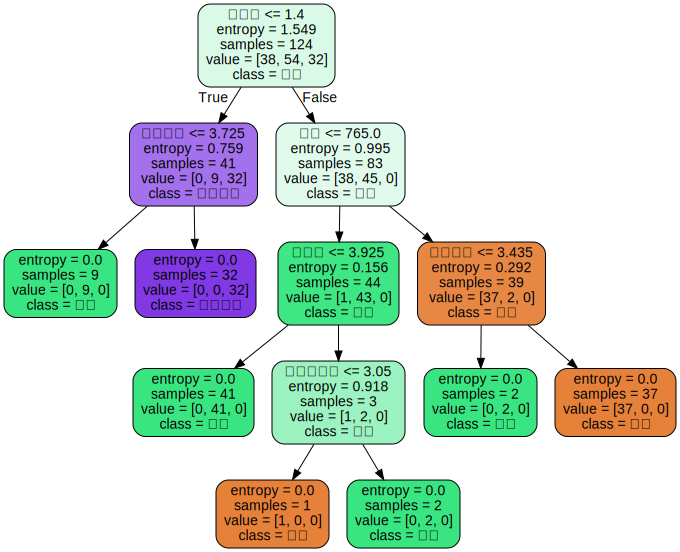

In [10]:
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_names
                                ,class_names=['琴酒','雪莉','貝爾摩德']
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [15]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.0),
 ('蘋果酸', 0.021499027094794745),
 ('灰', 0.0),
 ('灰的鹼性', 0.0),
 ('鎂', 0.0),
 ('酚', 0.0),
 ('類黃酮', 0.4082085854892642),
 ('非黃挽類酚類', 0.0),
 ('花青素', 0.0),
 ('顏色強度', 0.22125683065789314),
 ('色調', 0.0),
 ('稀釋葡萄酒', 0.014338277971129012),
 ('胺酸', 0.3346972787869189)]

### 每次分類都選最優的節點，但這樣跑出來一定是最優的樹嗎?

In [23]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=30
                                 ,splitter="random"  #best或random
                                 )
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
score

0.9629629629629629

### 剪枝參數

### max_depth
##### 限制樹的最大深度，超過設定的全部剪掉

### min_samples_leaf & min_samples_split
##### 前者限定每個分出來的節點最少要包含多少樣本(不符合就會換第二好的變數做分類)  後者則限制必須多少樣本才進行分割

### max_features
##### 砍掉超過限制個數的特徵

### min_impurity_decrease
##### 限定信息增益的大小，信息增益小於設定數值的分支不會發生(父節點信息熵-子節點的信息熵)


In [55]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ,random_state=30
                                 ,splitter="random"  #best或random
                                 ,max_depth=3
                                 ,min_samples_leaf=10
                                 ,min_samples_split=10
                                 )
clf = clf.fit(x_train, y_train)

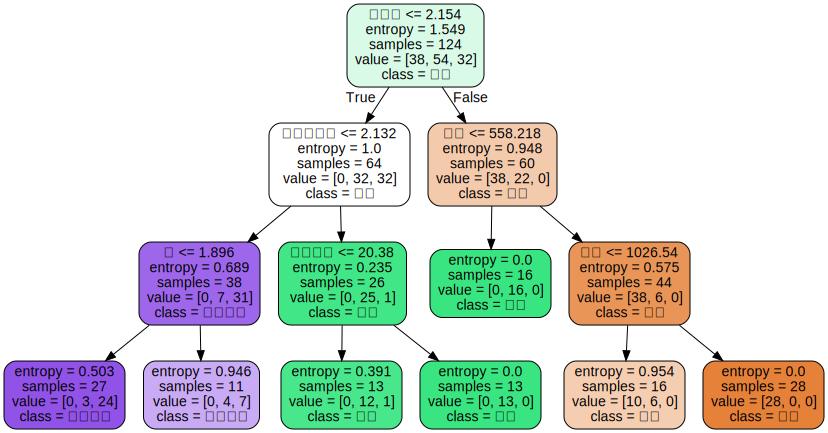

In [56]:
dot_data = tree.export_graphviz(clf
                                ,feature_names= feature_names
                                ,class_names=['琴酒','雪莉','貝爾摩德']
                                ,filled=True
                                ,rounded=True)
graph = graphviz.Source(dot_data)
graph

In [54]:
score =clf.score(x_test, y_test)
score

0.9629629629629629

In [ ]:
### 用作圖來看看Max_depth不同狀況下 樹的Score(正確率大概如何)
藉此來選擇Max_depth 應該選多少

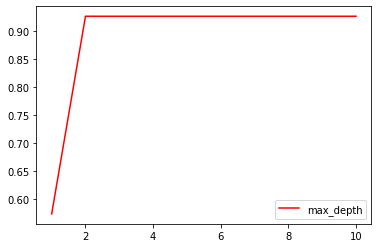

In [61]:
test =[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth = i+1
                                      ,criterion = "entropy"
                                      ,random_state = 30  
                                    )
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    test.append(score)

plt.plot(range(1,11), test, color="red", label="max_depth")
plt.legend()
plt.show()

In [62]:
clf.apply(x_test)

array([ 3,  6,  6, 10,  6, 10,  7, 10,  7,  6,  9, 10,  6,  3,  9,  9,  3,
        3, 10, 10,  3,  3,  3,  7, 10, 10,  3,  6, 10,  3,  3,  6, 10,  6,
       10,  6,  7,  3, 10,  6,  3,  3,  3, 10, 10,  2, 10,  6, 10,  3,  6,
        6, 10,  7], dtype=int64)

In [63]:
clf.predict(x_test)

array([2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       2, 1, 0, 0, 2, 1, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0,
       0, 1, 0, 1, 0, 2, 1, 1, 0, 1])